# Import Python Libraries

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load Dataset

Context of the Dataset : Predict next-day rain by training classification models on the target variable RainTomorrow.

**Goal: Using logistic regression to predict two discrete classes,'will RainTomorrow' or 'will not RainTomorrow,' based on a dataset of independent variables.**


Dataset: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

In [159]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Explotarory Data Analysis**

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Types of variables**

Important to check out types of variable in the dataset, segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.

In [161]:
cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(exclude='object').columns

In [162]:
cat_features

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [163]:
num_features

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [164]:
df[cat_features].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [88]:
df[num_features].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


**NaN Values:**

In [89]:
df[cat_features].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [90]:
df[num_features].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In Catagorical feature  WindGustDir, WindDir9am, WindDir3pm, RainToday,RainTomorrow has Null Values.

In [91]:
df['Date']

0         2008-12-01
1         2008-12-02
2         2008-12-03
3         2008-12-04
4         2008-12-05
             ...    
145455    2017-06-21
145456    2017-06-22
145457    2017-06-23
145458    2017-06-24
145459    2017-06-25
Name: Date, Length: 145460, dtype: object

Feature engineering of Date Columns

In [92]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 145460 entries, 0 to 145459
Series name: Date
Non-Null Count   Dtype 
--------------   ----- 
145460 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [93]:
# covert into datetime format from strings data type

df['Date'] = pd.to_datetime(df['Date'])

In [94]:
#Extract year, month, day from date columns

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [95]:
# now drop Date columns

df.drop('Date', axis=1, inplace = True)

In [96]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [97]:
# unique() function helps to check Cardinality
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [98]:
df['Location'].value_counts()

Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

In [99]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [100]:
df['WindGustDir'].value_counts()

WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: count, dtype: int64

In [101]:
df['WindDir9am'].unique()


array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [102]:
df['WindDir9am'].value_counts()

WindDir9am
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: count, dtype: int64

In [103]:
df['WindDir3pm'].unique()


array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [104]:
df['WindDir3pm'].value_counts()

WindDir3pm
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: count, dtype: int64

In [105]:
df['RainToday'].unique()


array(['No', 'Yes', nan], dtype=object)

In [106]:
df['RainToday'].value_counts()

RainToday
No     110319
Yes     31880
Name: count, dtype: int64

In [107]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [108]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

**Statistics of Numerical Features**

In [109]:
df[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


**Outlier**

Looks Like, the columns (**Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm**) may contain outliers by looking at the min, mid, max number.

Check Outlier through BoxPlot

Text(0, 0.5, 'WindSpeed3pm')

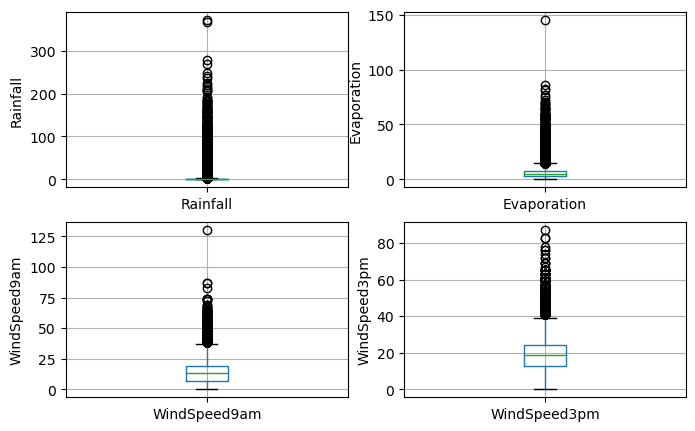

In [110]:
plt.figure(figsize=(8,5))

#Rainfall
plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

#Evaporation
plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

#WindSpeed9am
plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

#WindSpeed3pm
plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')




**Statistical tool :  The 5-number summary**

The 5-number summary is a valuable statistical tool for understanding data distribution and identifying outliers. It consists of five key values, look above code 'describe ()':
- the minimum (smallest data point),
- the first quartile (Q1),
- the median (Q2 or the second quartile),
- the third quartile (Q3), and
- the maximum (largest data point).


**To detect outliers**

we focus on the interquartile range **(IQR)**,

calculated as:

**IQR = Q3 - Q1**

This IQR represents the middle 50% of the data.

Outliers are identified as values that fall significantly lower fence and higher fence.

**Lower fence = Q1 - 1.5 * IQR**

**Higher fence = Q3 + 1.5 * IQR**

Essentially, the 5-number summary with IQR helps us pinpoint unusual data points that might deviate from the overall pattern and warrant closer investigation.


In [111]:
# lower and higher fence of Rainfall columns
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (1.5 * IQR)
Higher_fence = df.Rainfall.quantile(0.75) + (1.5 * IQR)

print('Lower fence of Rainfall:',Lower_fence)
print('Higher fence of Rainfall:',Higher_fence)

Lower fence of Rainfall: -1.2000000000000002
Higher fence of Rainfall: 2.0


In [112]:
# lower and higher fence of Evaporation columns
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (1.5 * IQR)
Higher_fence = df.Evaporation.quantile(0.75) + (1.5 * IQR)

print('Lower fence of Evaporation:',Lower_fence)
print('Higher fence of Evaporation:',Higher_fence)

Lower fence of Evaporation: -4.600000000000001
Higher fence of Evaporation: 14.600000000000001


In [113]:
# lower and higher fence of WindSpeed9am columns
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (1.5 * IQR)
Higher_fence = df.WindSpeed9am.quantile(0.75) + (1.5 * IQR)

print('Lower fence of WindSpeed9am:',Lower_fence)
print('Higher fence of WindSpeed9am:',Higher_fence)

Lower fence of WindSpeed9am: -11.0
Higher fence of WindSpeed9am: 37.0


In [114]:
# lower and higher fence of WindSpeed3pm columns
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (1.5 * IQR)
Higher_fence = df.WindSpeed3pm.quantile(0.75) + (1.5 * IQR)

print('Lower fence of WindSpeed3pm:',Lower_fence)
print('Higher fence of WindSpeed3pm:',Higher_fence)

Lower fence of WindSpeed3pm: -3.5
Higher fence of WindSpeed3pm: 40.5


# Split

In [115]:
# split into target variable and feature matrix
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [116]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [117]:
# split into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (116368, 24)
y_train: (116368,)
X_test: (29092, 24)
y_test: (29092,)


In [118]:
X_train.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Year', 'Month', 'Day'],
      dtype='object')

# Feature Engineering

**What is feature engineering?**


Feature Engineering is like turning plain data into valuable building blocks for our model. These 'building blocks' help our model understand things better and make more accurate predictions. We do this by playing around with different types of data and shaping them into something our model can use effectively.

In [119]:
cat_col = X_train.select_dtypes(include='object').columns
num_col = X_train.select_dtypes(exclude='object').columns

**Handling the NaN values**

In [120]:
X_train[cat_col].isnull().sum()

Location          0
WindGustDir    8270
WindDir9am     8448
WindDir3pm     3369
RainToday      2617
dtype: int64

In [121]:
X_train[num_col].isnull().sum()

MinTemp           1183
MaxTemp           1019
Rainfall          2617
Evaporation      50355
Sunshine         55899
WindGustSpeed     8218
WindSpeed9am      1409
WindSpeed3pm      2456
Humidity9am       2147
Humidity3pm       3598
Pressure9am      12091
Pressure3pm      12064
Cloud9am         44796
Cloud3pm         47557
Temp9am           1415
Temp3pm           2865
Year                 0
Month                0
Day                  0
dtype: int64

In [122]:
y_train.isnull().sum()

2623

In [123]:
y_test.isnull().sum()

644

Deleting the rows with Null values in target column because in compare to the size of total data null values in target column are very low and it is better to not making changes or edit in target column

In [124]:
y_train = y_train.notna()

In [125]:
y_test = y_test.notna()

In [126]:
y_train.isnull().sum()

0

In [127]:
y_test.isnull().sum()

0

**Imputatiuon**

There are two methods can be used to impute missing values.
- mean or median imputation
- random sample imputation.

When there are outliers in the dataset, we should use median imputation.

Imputation on Numerical values

In [128]:
# Fill missing values in numerical columns with their respective medians for both X_train and X_test
for df1 in [X_train, X_test]:
    for col in num_col:
        col_median = X_train[col].median()  # Calculate median for the column
        df1[col].fillna(col_median, inplace=True)  # Fill missing values in the column with the median


In [129]:
X_train[num_col].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

Handling NaN values of catagorical variable

In [130]:
X_train[cat_col].isnull().sum()

Location          0
WindGustDir    8270
WindDir9am     8448
WindDir3pm     3369
RainToday      2617
dtype: int64

In [131]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform on X_train
X_train[cat_col] = imputer.fit_transform(X_train[cat_col])

# Transform X_test
X_test[cat_col] = imputer.transform(X_test[cat_col])


In [132]:
X_train[cat_col].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [133]:
X_test[cat_col].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

Here, we do One Hot Encoding of Catagotical variable and get k-1 dummy variables after One Hot Encoding

In [134]:
# One-hot encode the specified columns
encoded_location = pd.get_dummies(X_train['Location'])
encoded_wind_gust_dir = pd.get_dummies(X_train['WindGustDir'])
encoded_wind_dir_9am = pd.get_dummies(X_train['WindDir9am'])
encoded_wind_dir_3pm = pd.get_dummies(X_train['WindDir3pm'])
encoded_RainToday = pd.get_dummies(X_train['RainToday'])

# Concatenate the one-hot encoded columns to X_train
X_train = pd.concat([X_train, encoded_location, encoded_wind_gust_dir, encoded_wind_dir_9am, encoded_wind_dir_3pm, encoded_RainToday], axis=1)

# Drop the original categorical columns
X_train.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], axis=1, inplace=True)

# Display the updated X_train DataFrame
print(X_train)



        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
22926      18.8     23.7       0.2          5.0       7.3           52.0   
80735       9.3     24.0       0.2          1.6      10.9           48.0   
121764     10.9     22.2       1.4          1.2       9.6           26.0   
139821     19.3     29.9       0.0          9.2      11.0           43.0   
1867       15.7     17.6      12.4          4.7       8.4           20.0   
...         ...      ...       ...          ...       ...            ...   
41993      17.8     38.1       0.0         26.0       8.4           39.0   
97639      12.5     27.3       0.0          4.7      10.0           30.0   
95939      17.0     29.8       0.0          5.6       8.4           22.0   
117952     11.9     22.0       3.8          6.2       7.7           35.0   
43567      12.0     16.7       0.8          4.7       8.4           50.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...      S  \
22926      

In [135]:
# One-hot encode the specified columns for X_test
encoded_location_test = pd.get_dummies(X_test['Location'])
encoded_wind_gust_dir_test = pd.get_dummies(X_test['WindGustDir'])
encoded_wind_dir_9am_test = pd.get_dummies(X_test['WindDir9am'])
encoded_wind_dir_3pm_test = pd.get_dummies(X_test['WindDir3pm'])
encoded_RainToday_test = pd.get_dummies(X_test['RainToday'])

# Concatenate the one-hot encoded columns to X_test
X_test = pd.concat([X_test, encoded_location_test, encoded_wind_gust_dir_test, encoded_wind_dir_9am_test, encoded_wind_dir_3pm_test,encoded_RainToday_test], axis=1)

# Drop the original categorical columns
X_test.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday'], axis=1, inplace=True)

# Display the updated X_test DataFrame
print(X_test)


        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
138175     21.9     39.4       1.6         11.2      11.5           57.0   
38638      20.5     37.5       0.0          9.2       8.4           59.0   
124058      5.1     17.2       0.2          4.7       8.4           50.0   
99214      11.9     16.8       1.0          4.7       8.4           28.0   
25097       7.5     21.3       0.0          4.7       8.4           15.0   
...         ...      ...       ...          ...       ...            ...   
133493     18.2     24.4       8.0          4.7       8.4           44.0   
43818       9.4     18.0       0.0          4.7       8.4           48.0   
28118      10.6     15.4       6.0          1.6       8.4           28.0   
120179     18.6     26.9       0.0          4.0       7.2           63.0   
30398       7.0     16.8       0.0          4.0      10.7           39.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...      S  \
138175     

In [136]:
X_train.shape

(116368, 118)

In [137]:
X_test.shape

(29092, 118)

**Feature Scaling**

**Normalization**

Normalization is a technique in feature scaling that helps bring all feature values into the range [0, 1].

It's particularly useful when the features have different units or scales, ensuring they have a consistent impact on the model.

In [138]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [139]:
X_train

array([[6.75742574e-01, 5.38752363e-01, 5.44069641e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.40594059e-01, 5.44423440e-01, 5.44069641e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.80198020e-01, 5.10396975e-01, 3.80848749e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [6.31188119e-01, 6.54064272e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.04950495e-01, 5.06616257e-01, 1.03373232e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.07425743e-01, 4.06427221e-01, 2.17627856e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [140]:
import pickle
# Save the scaler to a pickle file
with open('scaling.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Building Model

Baseline: The first step in building a model is baselining. To do this, ask yourself how you will know if the model you build is performing well?"

One way to think about this is to see how a "dumb" model would perform on the same data. Some people also call this a naïve or baseline model, but it's always a model makes only one prediction prediction should be.

Calculate the mean of your target vector y_train and assign it to the variable y_mean.

Now that we have the one prediction that our dumb model will always make, we need to generate a list that repeats the prediction for every observation in our dataset

In [141]:


y_mean = y_train.mean()

print("Mean score:", y_mean)


Mean score: 0.9774594390210367


y_train.mean() calculates the mean (average) of these target values, which is stored in the variable y_mean. It's the average math score of all students in the training set.


# Model Training
The steps to building and using a model are:

Define: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.

Fit: Capture patterns from provided data. This is the heart of modeling.

Predict: Just what it sounds like

Evaluate: Determine how accurate the model's predictions are.

Fitting simple linear regression

Import the Logistic Regression class from the linear_model to train the model. Instantiate an object of the class named regressor.

**Define the model**

In [142]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
clf = LogisticRegression(random_state=0)

**Fit The Model**

In [143]:
# fit the model
clf.fit(X_train, y_train)

c:\Users\faruk\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

**Predict The Model**

In [144]:
y_pred= clf.predict(X_test)

y_pred

array([ True,  True,  True, ...,  True,  True,  True])

**Predicting test set result**

At this point, the model is now trained and ready to predict the output of new observations. Remember, we split our dataset into train and test sets. We will provide test sets to the model and check its performance.

In [145]:
#y_test and y_pred are your actual and predicted labels
prediction_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Prediction Correct': y_test == y_pred  # True if prediction is correct, False otherwise
})

# Display the prediction_df DataFrame
print(prediction_df)

        Actual Value  Predicted Value  Prediction Correct
138175          True             True                True
38638           True             True                True
124058          True             True                True
99214           True             True                True
25097           True             True                True
...              ...              ...                 ...
133493          True             True                True
43818           True             True                True
28118           True             True                True
120179          True             True                True
30398           True             True                True

[29092 rows x 3 columns]


**Evaluate the Model**

In [146]:
from sklearn.metrics import accuracy_score

print('Model accuracy score:{0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score:0.9768


Check for overfitting and underfitting:

In [147]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9766
Test set score: 0.9768


The training-set accuracy score is 0.9766 while the test-set accuracy to be 0.9768. These two values are quite comparable.

So, there is no question of overfitting.

**Performance Matrix**

In [148]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.28      0.03      0.06       644
        True       0.98      1.00      0.99     28448

    accuracy                           0.98     29092
   macro avg       0.63      0.51      0.52     29092
weighted avg       0.96      0.98      0.97     29092



In [149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming y_test and y_pred are your actual and predicted labels
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 0.9767633713735735
Precision: 0.9784975878704342
Recall: 0.9981721034870641
F1 Score: 0.9882369318577295
Confusion Matrix:
 [[   20   624]
 [   52 28396]]


**confusion matrix**

In [150]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[   20   624]
 [   52 28396]]

True Positives(TP) =  20

True Negatives(TN) =  28396

False Positives(FP) =  624

False Negatives(FN) =  52


# new data prediction

In [151]:
X_train[0].reshape(1,-1)

array([[6.75742574e-01, 5.38752363e-01, 5.44069641e-04, 3.44827586e-02,
        5.03448276e-01, 3.56589147e-01, 2.38461538e-01, 3.37349398e-01,
        7.40000000e-01, 7.30000000e-01, 5.96694215e-01, 5.88800000e-01,
        5.55555556e-01, 8.75000000e-01, 6.03375527e-01, 5.29750480e-01,
        7.00000000e-01, 1.81818182e-01, 3.66666667e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [152]:
##transformation of new data
scaler.transform(X_train[0].reshape(1,-1))

c:\Users\faruk\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[ 2.27122341e-01,  1.00921595e-01,  1.48005887e-06,
         2.37812128e-04,  3.47205707e-02, -4.37473710e-02,
         1.83431953e-03,  4.06445057e-03,  7.40000000e-03,
         7.30000000e-03, -1.61967489e+01, -1.56241792e+01,
         6.17283951e-02,  1.09375000e-01,  1.64628176e-01,
         1.13814788e-01, -2.00630000e+02, -7.43801653e-02,
        -2.11111111e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [153]:
clf.predict(scaler.transform(X_train[0].reshape(1,-1)))

c:\Users\faruk\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([ True])

# Pickling The Model file For Deployment

In [154]:
import pickle

In [155]:
# Save the model to a pickle file
with open('clfmodel.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [156]:
# Load the model from the pickle file
with open('clfmodel.pkl', 'rb') as f:
    pickled_model = pickle.load(f)

In [157]:
## Prediction
# Perform prediction using the loaded model and a scaler
prediction = pickled_model.predict(scaler.transform(X_train[0].reshape(1, -1)))

print("Prediction:", prediction)

Prediction: [ True]


c:\Users\faruk\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
